In [2]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [14]:
import sys
import pickle
sys.path.append("../tools/")

import pandas

### Load the dictionary containing the dataset
with open("final_project_dataset.pkl", "r") as data_file:
    data_dict = pickle.load(data_file)
    
# Your code
df = pandas.DataFrame.from_records(list(data_dict.values()))
employees = pandas.Series(list(data_dict.keys()))

# set the index of df to be the employees series:
df.set_index(employees, inplace=True)

# You will have code here to add columns, i.e. new features,
# to the df, or remove rows, i.e. employees, from the df


# after you create features, the column names will be your new features
# create a list of column names:
new_features_list = df.columns.values


# create a dictionary from the dataframe
df_dict = df.to_dict('index')

# compare the original dictionary 
# with the dictionary reconstructed from the dataframe:  
print df_dict == data_dict


True


In [16]:
df.replace(to_replace = "NaN", value = np.nan, inplace = True)
for i in df.index:
    if df.ix[i].count() > 19:
        print df.ix[i]

In [4]:
print df.keys()
print len(df.keys())
print len(employees)

Index([u'bonus', u'deferral_payments', u'deferred_income', u'director_fees',
       u'email_address', u'exercised_stock_options', u'expenses',
       u'from_messages', u'from_poi_to_this_person',
       u'from_this_person_to_poi', u'loan_advances', u'long_term_incentive',
       u'other', u'poi', u'restricted_stock', u'restricted_stock_deferred',
       u'salary', u'shared_receipt_with_poi', u'to_messages',
       u'total_payments', u'total_stock_value'],
      dtype='object')
21
146


In [64]:
print df.head()

                    bonus deferral_payments deferred_income director_fees  \
METTS MARK         600000               NaN             NaN           NaN   
BAXTER JOHN C     1200000           1295738        -1386055           NaN   
ELLIOTT STEVEN     350000               NaN         -400729           NaN   
CORDES WILLIAM R      NaN               NaN             NaN           NaN   
HANNON KEVIN P    1500000               NaN        -3117011           NaN   

                             email_address exercised_stock_options expenses  \
METTS MARK            mark.metts@enron.com                     NaN    94299   
BAXTER JOHN C                          NaN                 6680544    11200   
ELLIOTT STEVEN    steven.elliott@enron.com                 4890344    78552   
CORDES WILLIAM R     bill.cordes@enron.com                  651850      NaN   
HANNON KEVIN P      kevin.hannon@enron.com                 5538001    34039   

                 from_messages from_poi_to_this_person  \
METT

In [66]:
print df.describe()

       bonus deferral_payments deferred_income director_fees email_address  \
count    146               146             146           146           146   
unique    42                40              45            18           112   
top      NaN               NaN             NaN           NaN           NaN   
freq      64               107              97           129            35   

       exercised_stock_options expenses from_messages from_poi_to_this_person  \
count                      146      146           146                     146   
unique                     102       95            65                      58   
top                        NaN      NaN           NaN                     NaN   
freq                        44       51            60                      60   

       from_this_person_to_poi        ...        long_term_incentive other  \
count                      146        ...                        146   146   
unique                      42        ...      

In [67]:
#change string NaN to 0
df.replace(to_replace = "NaN", value = 0, inplace = True)
print df.describe()

              bonus  deferral_payments  deferred_income  director_fees  \
count  1.460000e+02       1.460000e+02     1.460000e+02   1.460000e+02   
mean   1.333474e+06       4.387965e+05    -3.827622e+05   1.942249e+04   
std    8.094029e+06       2.741325e+06     2.378250e+06   1.190543e+05   
min    0.000000e+00      -1.025000e+05    -2.799289e+07   0.000000e+00   
25%    0.000000e+00       0.000000e+00    -3.792600e+04   0.000000e+00   
50%    3.000000e+05       0.000000e+00     0.000000e+00   0.000000e+00   
75%    8.000000e+05       9.684500e+03     0.000000e+00   0.000000e+00   
max    9.734362e+07       3.208340e+07     0.000000e+00   1.398517e+06   

       exercised_stock_options      expenses  from_messages  \
count             1.460000e+02  1.460000e+02     146.000000   
mean              4.182736e+06  7.074827e+04     358.602740   
std               2.607040e+07  4.327163e+05    1441.259868   
min               0.000000e+00  0.000000e+00       0.000000   
25%               

In [68]:
print df.columns.values

['bonus' 'deferral_payments' 'deferred_income' 'director_fees'
 'email_address' 'exercised_stock_options' 'expenses' 'from_messages'
 'from_poi_to_this_person' 'from_this_person_to_poi' 'loan_advances'
 'long_term_incentive' 'other' 'poi' 'restricted_stock'
 'restricted_stock_deferred' 'salary' 'shared_receipt_with_poi'
 'to_messages' 'total_payments' 'total_stock_value']


In [69]:
df = df.drop('email_address', axis=1)
print df.columns.values

['bonus' 'deferral_payments' 'deferred_income' 'director_fees'
 'exercised_stock_options' 'expenses' 'from_messages'
 'from_poi_to_this_person' 'from_this_person_to_poi' 'loan_advances'
 'long_term_incentive' 'other' 'poi' 'restricted_stock'
 'restricted_stock_deferred' 'salary' 'shared_receipt_with_poi'
 'to_messages' 'total_payments' 'total_stock_value']


In [70]:
print df['bonus'].max()


97343619


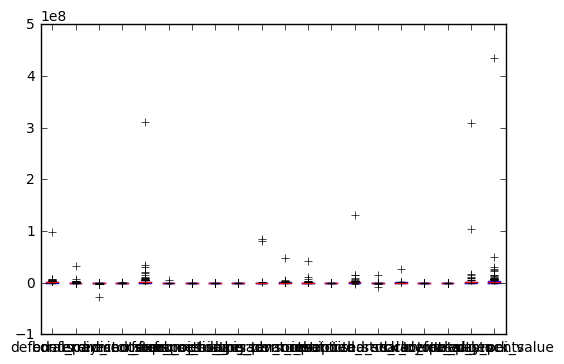

In [71]:
df.plot.box()

#we find something weird because there exist an extreme value.
#let us check what the row name is.

In [72]:
print df['bonus'].argmax()


TOTAL


In [73]:
print df.ix['TOTAL']
#the poi of total is false, it disturb the analysis, we need to delete it.

bonus                         97343619
deferral_payments             32083396
deferred_income              -27992891
director_fees                  1398517
exercised_stock_options      311764000
expenses                       5235198
from_messages                        0
from_poi_to_this_person              0
from_this_person_to_poi              0
loan_advances                 83925000
long_term_incentive           48521928
other                         42667589
poi                              False
restricted_stock             130322299
restricted_stock_deferred     -7576788
salary                        26704229
shared_receipt_with_poi              0
to_messages                          0
total_payments               309886585
total_stock_value            434509511
Name: TOTAL, dtype: object


In [74]:
df = df.drop('TOTAL', axis=0)

In [75]:
print df['bonus'].argmax()

LAVORATO JOHN J


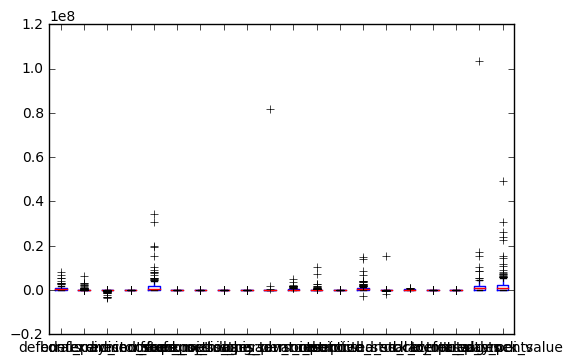

In [76]:
df.plot.box()

In [77]:
print df['total_payments'].argmax()

LAY KENNETH L


In [78]:
print df.ix[df['total_payments'].argmax()]

bonus                          7000000
deferral_payments               202911
deferred_income                -300000
director_fees                        0
exercised_stock_options       34348384
expenses                         99832
from_messages                       36
from_poi_to_this_person            123
from_this_person_to_poi             16
loan_advances                 81525000
long_term_incentive            3600000
other                         10359729
poi                               True
restricted_stock              14761694
restricted_stock_deferred            0
salary                         1072321
shared_receipt_with_poi           2411
to_messages                       4273
total_payments               103559793
total_stock_value             49110078
Name: LAY KENNETH L, dtype: object


In [79]:
print df['loan_advances'].argmax()

LAY KENNETH L


In [80]:
data_dict = dict(df.to_dict('index'))
print data_dict

{'METTS MARK': {'salary': 365788L, 'to_messages': 807L, 'deferral_payments': 0L, 'total_payments': 1061827L, 'long_term_incentive': 0L, 'loan_advances': 0L, 'bonus': 600000L, 'restricted_stock_deferred': 0L, 'total_stock_value': 585062L, 'expenses': 94299L, 'from_poi_to_this_person': 38L, 'exercised_stock_options': 0L, 'from_messages': 29L, 'other': 1740L, 'from_this_person_to_poi': 1L, 'poi': False, 'deferred_income': 0L, 'shared_receipt_with_poi': 702L, 'restricted_stock': 585062L, 'director_fees': 0L}, 'BAXTER JOHN C': {'salary': 267102L, 'to_messages': 0L, 'deferral_payments': 1295738L, 'total_payments': 5634343L, 'long_term_incentive': 1586055L, 'loan_advances': 0L, 'bonus': 1200000L, 'restricted_stock_deferred': 0L, 'total_stock_value': 10623258L, 'expenses': 11200L, 'from_poi_to_this_person': 0L, 'exercised_stock_options': 6680544L, 'from_messages': 0L, 'other': 2660303L, 'from_this_person_to_poi': 0L, 'poi': False, 'deferred_income': -1386055L, 'shared_receipt_with_poi': 0L, 'r

In [81]:
print df_dict == data_dict

False


### Redo the whole dataset by delete row = total

In [2]:
#reduce the outlier called "total"
with open("final_project_dataset.pkl", "r") as data_file:
    data_dict = pickle.load(data_file)

df = pandas.DataFrame.from_records(list(data_dict.values()))
employees = pandas.Series(list(data_dict.keys()))
# set the index of df to be the employees series:
df.set_index(employees, inplace=True)
df = df.drop("TOTAL", axis = 0)
df = df.drop("email_address", axis = 1)

In [7]:
print df.describe()

       bonus deferral_payments deferred_income director_fees  \
count    145               145             145           145   
unique    41                39              44            17   
top      NaN               NaN             NaN           NaN   
freq      64               107              97           129   

       exercised_stock_options expenses from_messages from_poi_to_this_person  \
count                      145      145           145                     145   
unique                     101       94            65                      58   
top                        NaN      NaN           NaN                     NaN   
freq                        44       51            59                      59   

       from_this_person_to_poi loan_advances long_term_incentive other    poi  \
count                      145           145                 145   145    145   
unique                      42             4                  52    92      2   
top                        NaN

In [19]:
df.replace(to_replace = "NaN", value = np.nan, inplace = True)
           

In [20]:
df.isnull().sum()

bonus                         64
deferral_payments            107
deferred_income               97
director_fees                129
exercised_stock_options       44
expenses                      51
from_messages                 59
from_poi_to_this_person       59
from_this_person_to_poi       59
loan_advances                142
long_term_incentive           80
other                         53
poi                            0
restricted_stock              36
restricted_stock_deferred    128
salary                        51
shared_receipt_with_poi       59
to_messages                   59
total_payments                21
total_stock_value             20
dtype: int64

In [47]:
#choose the column with NaN over 100
# total people 145, poi: 18
total = 145
ratio = 18.0/145.0
print float(18.0/145.0)

print "\nw/ deferral_payments: ", df[df['deferral_payments'].notnull()]['poi'].sum()
print "reasonable ratio: ", ratio *(total - df['deferral_payments'].isnull().sum())
print df[df['deferral_payments'].notnull()]['poi']


print "\nw/ director_fees: ", df[df['director_fees'].notnull()]['poi'].sum()
print df[df['director_fees'].notnull()]['poi']

print "\nw/ restricted_stock_deferred: ", df[df['restricted_stock_deferred'].notnull()]['poi'].sum()
print df[df['restricted_stock_deferred'].notnull()]['poi']

print "\nw/ loan_advances: ", df[df['loan_advances'].notnull()]['poi'].sum()
print df[df['loan_advances'].notnull()]['poi']


0.124137931034

w/ deferral_payments:  5
reasonable ratio:  4.71724137931
BAXTER JOHN C                  False
MEYER ROCKFORD G               False
HORTON STANLEY C               False
PIPER GREGORY F                False
HUMPHREY GENE E                False
GIBBS DANA R                   False
COLWELL WESLEY                  True
MULLER MARK S                  False
WALTERS GARETH W               False
BELFER ROBERT                  False
RIEKER PAULA H                  True
HAYES ROBERT E                 False
DETMERING TIMOTHY J            False
SULLIVAN-SHAKLOVITZ COLLEEN    False
LINDHOLM TOD A                 False
LAY KENNETH L                   True
OLSON CINDY K                  False
GAHN ROBERT S                  False
HAEDICKE MARK E                False
BAZELIDES PHILIP J             False
BELDEN TIMOTHY N                True
THORN TERENCE H                False
FOY JOE                        False
PRENTICE JAMES                 False
GRAY RODNEY                    False
N

In [50]:
for feature in df.columns.values:
    print " w/ {}: {}".format(feature, df[df[feature].notnull()]['poi'].sum())
    print "reasonable poi when distributed: {}\n".format(ratio *(total - df[feature].isnull().sum()))
    #print df[df['deferral_payments'].notnull()]['poi']

 w/ bonus: 16
reasonable poi when distributed: 10.0551724138

 w/ deferral_payments: 5
reasonable poi when distributed: 4.71724137931

 w/ deferred_income: 11
reasonable poi when distributed: 5.95862068966

 w/ director_fees: 0
reasonable poi when distributed: 1.98620689655

 w/ exercised_stock_options: 12
reasonable poi when distributed: 12.5379310345

 w/ expenses: 18
reasonable poi when distributed: 11.6689655172

 w/ from_messages: 14
reasonable poi when distributed: 10.675862069

 w/ from_poi_to_this_person: 14
reasonable poi when distributed: 10.675862069

 w/ from_this_person_to_poi: 14
reasonable poi when distributed: 10.675862069

 w/ loan_advances: 1
reasonable poi when distributed: 0.372413793103

 w/ long_term_incentive: 12
reasonable poi when distributed: 8.06896551724

 w/ other: 18
reasonable poi when distributed: 11.4206896552

 w/ poi: 18
reasonable poi when distributed: 18.0

 w/ restricted_stock: 17
reasonable poi when distributed: 13.5310344828

 w/ restricted_stock

In [51]:
df['shared_receipt_with_poi'].describe()

count      86.000000
mean     1176.465116
std      1178.317641
min         2.000000
25%       249.750000
50%       740.500000
75%      1888.250000
max      5521.000000
Name: shared_receipt_with_poi, dtype: float64

In [64]:
df.ix[df['shared_receipt_with_poi'].argmax]

bonus                           5.25e+06
deferral_payments            2.14401e+06
deferred_income             -2.33443e+06
director_fees                        NaN
exercised_stock_options           953136
expenses                           17355
from_messages                        484
from_poi_to_this_person              228
from_this_person_to_poi              108
loan_advances                        NaN
long_term_incentive                  NaN
other                             210698
poi                                 True
restricted_stock                  157569
restricted_stock_deferred            NaN
salary                            213999
shared_receipt_with_poi             5521
to_messages                         7991
total_payments               5.50163e+06
total_stock_value            1.11070e+06
Name: BELDEN TIMOTHY N, dtype: object

In [52]:
df['from_poi_to_this_person'].describe()

count     86.000000
mean      64.895349
std       86.979244
min        0.000000
25%       10.000000
50%       35.000000
75%       72.250000
max      528.000000
Name: from_poi_to_this_person, dtype: float64

In [63]:
df.ix[df['from_poi_to_this_person'].argmax]

bonus                              8e+06
deferral_payments                    NaN
deferred_income                      NaN
director_fees                        NaN
exercised_stock_options        4.159e+06
expenses                           49537
from_messages                       2585
from_poi_to_this_person              528
from_this_person_to_poi              411
loan_advances                        NaN
long_term_incentive          2.03538e+06
other                               1552
poi                                False
restricted_stock             1.00815e+06
restricted_stock_deferred            NaN
salary                            339288
shared_receipt_with_poi             3962
to_messages                         7259
total_payments               1.04258e+07
total_stock_value            5.16714e+06
Name: LAVORATO JOHN J, dtype: object

In [53]:
df['from_this_person_to_poi'].describe()

count     86.000000
mean      41.232558
std      100.073111
min        0.000000
25%        1.000000
50%        8.000000
75%       24.750000
max      609.000000
Name: from_this_person_to_poi, dtype: float64

In [62]:
df.ix[df['from_this_person_to_poi'].argmax]

bonus                              3e+06
deferral_payments                    NaN
deferred_income                      NaN
director_fees                        NaN
exercised_stock_options      2.29111e+06
expenses                           86174
from_messages                       3069
from_poi_to_this_person               66
from_this_person_to_poi              609
loan_advances                        NaN
long_term_incentive          1.29498e+06
other                               1661
poi                                 True
restricted_stock             1.32315e+06
restricted_stock_deferred            NaN
salary                            365163
shared_receipt_with_poi             2097
to_messages                         3093
total_payments               4.74798e+06
total_stock_value            3.61426e+06
Name: DELAINEY DAVID W, dtype: object

In [55]:
df['from_messages'].describe()

count       86.000000
mean       608.790698
std       1841.033949
min         12.000000
25%         22.750000
50%         41.000000
75%        145.500000
max      14368.000000
Name: from_messages, dtype: float64

In [61]:
df.ix[df['from_messages'].argmax]

bonus                             400000
deferral_payments                    NaN
deferred_income                      NaN
director_fees                        NaN
exercised_stock_options           850010
expenses                           83585
from_messages                      14368
from_poi_to_this_person               41
from_this_person_to_poi              171
loan_advances                        NaN
long_term_incentive               323466
other                               4669
poi                                False
restricted_stock                  126027
restricted_stock_deferred            NaN
salary                            275101
shared_receipt_with_poi              583
to_messages                         4607
total_payments               1.08682e+06
total_stock_value                 976037
Name: KAMINSKI WINCENTY J, dtype: object

In [56]:
df['to_messages'].describe()

count       86.000000
mean      2073.860465
std       2582.700981
min         57.000000
25%        541.250000
50%       1211.000000
75%       2634.750000
max      15149.000000
Name: to_messages, dtype: float64

In [60]:
df.ix[df['to_messages'].argmax]

bonus                             650000
deferral_payments                    NaN
deferred_income                      NaN
director_fees                        NaN
exercised_stock_options           607837
expenses                          137767
from_messages                       1215
from_poi_to_this_person               74
from_this_person_to_poi               65
loan_advances                        NaN
long_term_incentive                  NaN
other                                705
poi                                False
restricted_stock                  379164
restricted_stock_deferred            NaN
salary                            269076
shared_receipt_with_poi             4527
to_messages                        15149
total_payments               1.05755e+06
total_stock_value                 987001
Name: SHAPIRO RICHARD S, dtype: object

In [70]:
for i in df.index:
        if df.ix[i].count() < 3:
            print df.ix[i]

In [69]:
df.replace(to_replace = np.nan, value = 0, inplace = True)

In [99]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

n_from_poi = scaler.fit_transform(df.from_poi_to_this_person.values.reshape(-1,1))
n_to_poi = scaler.fit_transform(df.from_this_person_to_poi.values.reshape(-1,1))
n_shared_receipt_poi = scaler.fit_transform(df.shared_receipt_with_poi .values.reshape(-1,1))
poi_email_receipt = n_from_poi + n_to_poi+n_shared_receipt_poi
print poi_email_receipt

[[  2.00762612e-01]
 [  0.00000000e+00]
 [  0.00000000e+00]
 [  2.94447372e-02]
 [  2.82554858e-01]
 [  0.00000000e+00]
 [  3.98478536e-03]
 [  5.56091506e-01]
 [  3.02493852e-01]
 [  3.28743980e-01]
 [  6.84080744e-02]
 [  3.01534636e-02]
 [  4.71933046e-01]
 [  5.56011975e-01]
 [  4.16591197e-03]
 [  0.00000000e+00]
 [  6.77643172e-01]
 [  4.33757060e-02]
 [  9.97389843e-02]
 [  0.00000000e+00]
 [  0.00000000e+00]
 [  7.11391903e-02]
 [  1.45848732e+00]
 [  0.00000000e+00]
 [  0.00000000e+00]
 [  6.27668332e-01]
 [  0.00000000e+00]
 [  4.97782571e-02]
 [  0.00000000e+00]
 [  2.98682043e-01]
 [  3.72962885e-01]
 [  0.00000000e+00]
 [  1.38454633e+00]
 [  1.04380643e-01]
 [  0.00000000e+00]
 [  0.00000000e+00]
 [  2.40413559e-01]
 [  0.00000000e+00]
 [  1.52791957e-01]
 [  3.93593607e-02]
 [  1.42644874e-01]
 [  0.00000000e+00]
 [  6.33852740e-01]
 [  2.39250047e+00]
 [  0.00000000e+00]
 [  0.00000000e+00]
 [  0.00000000e+00]
 [  2.17351929e-03]
 [  0.00000000e+00]
 [  1.58087509e-01]


In [100]:
poi_email_receipt = [n[0] for n in list(poi_email)]


In [102]:
df['poi_email_receipt'] = pandas.Series(poi_email_receipt, index = df.index)
print df['poi_email_receipt'].head()

METTS MARK          0.073612
BAXTER JOHN C       0.000000
ELLIOTT STEVEN      0.000000
CORDES WILLIAM R    0.018939
HANNON KEVIN P      0.095089
Name: poi_email_receipt, dtype: float64


In [125]:
n_to_msgs = scaler.fit_transform(df.to_messages.values.reshape(-1,1))
n_from_msgs = scaler.fit_transform(df.from_messages.values.reshape(-1,1))

poi_mails = n_from_poi + n_to_poi
poi_mails = [n[0] for n in list(poi_mails)]
poi_mails = pandas.Series(poi_mails)

all_mails = n_to_msgs + n_from_msgs
all_mails = [n[0] for n in list(all_mails)]
all_mails = pandas.Series(all_mails)

poi_mail_ratio =  list((poi_mails+1)/(all_mails+1))
df['poi_mail_ratio'] = pandas.Series(poi_mail_ratio, index = df.index)

In [126]:
print df['poi_mail_ratio']

METTS MARK              1.017363
BAXTER JOHN C           1.000000
ELLIOTT STEVEN          1.000000
CORDES WILLIAM R        0.969248
HANNON KEVIN P          1.022293
MORDAUNT KRISTINA M     1.000000
MEYER ROCKFORD G        0.983030
MCMAHON JEFFREY         0.994602
HORTON STANLEY C        0.900926
PIPER GREGORY F         1.088569
HUMPHREY GENE E         1.036866
UMANOFF ADAM S          1.014027
BLACHMAN JEREMY M       0.902333
SUNDE MARTIN            0.926996
GIBBS DANA R            0.988151
LOWRY CHARLES P         1.000000
COLWELL WESLEY          1.316202
MULLER MARK S           1.012510
JACKSON CHARLENE R      1.056438
WESTFAHL RICHARD K      1.000000
WALTERS GARETH W        1.000000
WALLS JR ROBERT H       0.978892
KITCHEN LOUISE          1.075185
CHAN RONNIE             1.000000
BELFER ROBERT           1.000000
SHANKMAN JEFFREY A      0.939325
WODRASKA JOHN           1.000000
BERGSIEKER RICHARD P    0.978810
URQUHART JOHN A         1.000000
BIBI PHILIPPE A         0.952955
          

In [120]:
print df.columns.values

['bonus' 'deferral_payments' 'deferred_income' 'director_fees'
 'exercised_stock_options' 'expenses' 'from_messages'
 'from_poi_to_this_person' 'from_this_person_to_poi' 'loan_advances'
 'long_term_incentive' 'other' 'poi' 'restricted_stock'
 'restricted_stock_deferred' 'salary' 'shared_receipt_with_poi'
 'to_messages' 'total_payments' 'total_stock_value' 'poi_email_receipt'
 'poi_mail_ratio']


In [121]:
features = list(df.columns.values)
features.remove('poi')

print ['poi']+features

['poi', 'bonus', 'deferral_payments', 'deferred_income', 'director_fees', 'exercised_stock_options', 'expenses', 'from_messages', 'from_poi_to_this_person', 'from_this_person_to_poi', 'loan_advances', 'long_term_incentive', 'other', 'restricted_stock', 'restricted_stock_deferred', 'salary', 'shared_receipt_with_poi', 'to_messages', 'total_payments', 'total_stock_value', 'poi_email_receipt', 'poi_mail_ratio']


### Rethinking the part which nan over 100.

In [87]:
print len(df.columns.values)

18


In [104]:
count = 0
for i in df.index:
    if df.ix[i]['poi']:
            count += 1
            print i, df.ix[i].count(),df.ix[i]['poi']
print employees
print count

HANNON KEVIN P 16 True
COLWELL WESLEY 15 True
RIEKER PAULA H 16 True
KOPPER MICHAEL J 9 True
SHELBY REX 15 True
DELAINEY DAVID W 15 True
LAY KENNETH L 17 True
BOWEN JR RAYMOND M 15 True
BELDEN TIMOTHY N 16 True
FASTOW ANDREW S 10 True
CALGER CHRISTOPHER F 15 True
RICE KENNETH D 16 True
SKILLING JEFFREY K 15 True
YEAGER F SCOTT 8 True
HIRKO JOSEPH 7 True
KOENIG MARK E 15 True
CAUSEY RICHARD A 15 True
GLISAN JR BEN F 15 True
0                METTS MARK
1             BAXTER JOHN C
2            ELLIOTT STEVEN
3          CORDES WILLIAM R
4            HANNON KEVIN P
5       MORDAUNT KRISTINA M
6          MEYER ROCKFORD G
7           MCMAHON JEFFREY
8          HORTON STANLEY C
9           PIPER GREGORY F
10          HUMPHREY GENE E
11           UMANOFF ADAM S
12        BLACHMAN JEREMY M
13             SUNDE MARTIN
14             GIBBS DANA R
15          LOWRY CHARLES P
16           COLWELL WESLEY
17            MULLER MARK S
18       JACKSON CHARLENE R
19       WESTFAHL RICHARD K
20         WA

In [105]:
print df.ix['DERRICK JR. JAMES V']

bonus                           800000
deferral_payments                  NaN
deferred_income             -1.284e+06
director_fees                      NaN
exercised_stock_options    8.83191e+06
expenses                         51124
from_messages                      909
from_poi_to_this_person             64
from_this_person_to_poi             20
long_term_incentive             484000
other                             7482
poi                              False
restricted_stock           1.78738e+06
salary                          492375
shared_receipt_with_poi           1401
to_messages                       2181
total_payments                  550981
total_stock_value          8.83191e+06
Name: DERRICK JR. JAMES V, dtype: object


In [1]:
import numpy as np

#reduce the outlier called "total"
with open("final_project_dataset.pkl", "r") as data_file:
    data_dict = pickle.load(data_file)

df = pandas.DataFrame.from_records(list(data_dict.values()))
employees = pandas.Series(list(data_dict.keys()))
# set the index of df to be the employees series:
df.set_index(employees, inplace=True)
df = df.drop("TOTAL", axis = 0)
df = df.drop("THE TRAVEL AGENCY IN THE PARK", axis =0)


# substitue the string NaN to np.nan
df.replace(to_replace = "NaN", value = np.nan, inplace = True) 

# drop the people who have less info
count = 0
for i in df.index:
        if df.ix[i].count() < 11 and not df.ix[i]['poi']:
            count += 1
            print i, df.ix[i]['poi'],"\n",df.ix[i]
            #print df.ix[i]
            #df = df.drop(i, axis = 0)
print count           
#drop the email
df = df.drop("email_address", axis = 1)

# drop the feature with so many NaN --over 100 NaN
#df = df.drop('loan_advances', axis = 1)
#df = df.drop('restricted_stock_deferred', axis = 1)
#df = df.drop('director_fees', axis = 1)
#df = df.drop('deferral_payments', axis = 1)




NameError: name 'pickle' is not defined

In [108]:
count = 0
for i in df.index:
        if df.ix[i].count() > 7 and df.ix[i]['poi']:
            print i, df.ix[i].count()
            count = count + 1
        elif df.ix[i]['poi']:
            print "=== not over 8 non NaN value ==="
            print i, df.ix[i].count()
print "over 8 non NaN value poi", count

HANNON KEVIN P 16
COLWELL WESLEY 15
RIEKER PAULA H 16
KOPPER MICHAEL J 9
SHELBY REX 15
DELAINEY DAVID W 15
LAY KENNETH L 17
BOWEN JR RAYMOND M 15
BELDEN TIMOTHY N 16
FASTOW ANDREW S 10
CALGER CHRISTOPHER F 15
RICE KENNETH D 16
SKILLING JEFFREY K 15
YEAGER F SCOTT 8
=== not over 8 non NaN value ===
HIRKO JOSEPH 7
KOENIG MARK E 15
CAUSEY RICHARD A 15
GLISAN JR BEN F 15
over 8 non NaN value poi 17


In [64]:
for i in df.columns.values:
    print "\n====={}=====".format(i)
    print df[df['poi'] == True][i].describe()
    print "\n"
    print df[df['poi'] == False][i].describe()


=====bonus=====
count    1.600000e+01
mean     2.075000e+06
std      2.047437e+06
min      2.000000e+05
25%      7.750000e+05
50%      1.275000e+06
75%      2.062500e+06
max      7.000000e+06
Name: bonus, dtype: float64


count    6.500000e+01
mean     9.868249e+05
std      1.173880e+06
min      7.000000e+04
25%      4.000000e+05
50%      7.000000e+05
75%      1.000000e+06
max      8.000000e+06
Name: bonus, dtype: float64

=====deferral_payments=====
count    5.000000e+00
mean     5.198942e+05
std      9.128895e+05
min      1.025900e+04
25%      2.761000e+04
50%      2.029110e+05
75%      2.146780e+05
max      2.144013e+06
Name: deferral_payments, dtype: float64


count    3.300000e+01
mean     8.903462e+05
std      1.341381e+06
min     -1.025000e+05
25%      8.543000e+04
50%      2.604550e+05
75%      8.753070e+05
max      6.426990e+06
Name: deferral_payments, dtype: float64

=====deferred_income=====
count    1.100000e+01
mean    -1.035313e+06
std      1.334972e+06
min     -3.504386

In [55]:
df.isnull().sum()

bonus                         35
deferral_payments             83
deferred_income               78
director_fees                112
exercised_stock_options       28
expenses                      32
from_messages                 30
from_poi_to_this_person       30
from_this_person_to_poi       30
long_term_incentive           52
other                         27
poi                            0
restricted_stock              14
restricted_stock_deferred    104
salary                        23
shared_receipt_with_poi       30
to_messages                   30
total_payments                11
total_stock_value              6
dtype: int64

In [69]:
for i in df.index:
        if not df.ix[i]['poi']:
            print i, df.ix[i].count(), df.ix[i]['poi'], df.ix[i]['total_stock_value']
           

METTS MARK 13 False 585062.0
BAXTER JOHN C 12 False 10623258.0
ELLIOTT STEVEN 10 False 6678735.0
CORDES WILLIAM R 9 False 1038185.0
MORDAUNT KRISTINA M 8 False 208510.0
MEYER ROCKFORD G 11 False 955873.0
MCMAHON JEFFREY 15 False 1662855.0
HORTON STANLEY C 11 False 7256648.0
PIPER GREGORY F 16 False 880290.0
HUMPHREY GENE E 12 False 2282768.0
UMANOFF ADAM S 10 False nan
BLACHMAN JEREMY M 15 False 954354.0
SUNDE MARTIN 13 False 698920.0
GIBBS DANA R 11 False 2218275.0
LOWRY CHARLES P 4 False 372205.0
MULLER MARK S 16 False 1416848.0
JACKSON CHARLENE R 14 False 725735.0
WESTFAHL RICHARD K 9 False 384930.0
WALTERS GARETH W 6 False 1030329.0
WALLS JR ROBERT H 15 False 5898997.0
KITCHEN LOUISE 14 False 547143.0
CHAN RONNIE 4 False nan
BELFER ROBERT 6 False -44093.0
SHANKMAN JEFFREY A 15 False 2072035.0
WODRASKA JOHN 3 False nan
BERGSIEKER RICHARD P 15 False 659249.0
URQUHART JOHN A 5 False nan
BIBI PHILIPPE A 15 False 1843816.0
WHALEY DAVID A 3 False 98718.0
BECK SALLY W 13 False 126027.0
HA

In [71]:
for i in df.index:
        if df.ix[i]['poi']:
            print i, df.ix[i].count(), df.ix[i]['poi'], df.ix[i]['total_stock_value']
           

 HANNON KEVIN P 16 True 6391065.0
COLWELL WESLEY 15 True 698242.0
RIEKER PAULA H 16 True 1918887.0
KOPPER MICHAEL J 9 True 985032.0
SHELBY REX 15 True 2493616.0
DELAINEY DAVID W 15 True 3614261.0
LAY KENNETH L 17 True 49110078.0
BOWEN JR RAYMOND M 15 True 252055.0
BELDEN TIMOTHY N 16 True 1110705.0
FASTOW ANDREW S 10 True 1794412.0
CALGER CHRISTOPHER F 15 True 126027.0
RICE KENNETH D 16 True 22542539.0
SKILLING JEFFREY K 15 True 26093672.0
YEAGER F SCOTT 8 True 11884758.0
HIRKO JOSEPH 7 True 30766064.0
KOENIG MARK E 15 True 1920055.0
CAUSEY RICHARD A 15 True 2502063.0
GLISAN JR BEN F 15 True 778546.0


In [52]:
df.ix["LOCKHART EUGENE E"]

bonus                        NaN
deferred_income              NaN
exercised_stock_options      NaN
expenses                     NaN
from_messages                NaN
from_poi_to_this_person      NaN
from_this_person_to_poi      NaN
long_term_incentive          NaN
other                        NaN
poi                        False
restricted_stock             NaN
salary                       NaN
shared_receipt_with_poi      NaN
to_messages                  NaN
total_payments               NaN
total_stock_value            NaN
Name: LOCKHART EUGENE E, dtype: object